The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit

In [1]:
#Import Statements.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("bank-full.csv", delimiter=';')

In [4]:
df.head(n=5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.shape

(45211, 17)

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [8]:
# List of categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome', 'y']

# Run value_counts on each categorical variable and print the results
for var in categorical_vars:
    print(f"Value counts for {var}:\n{df[var].value_counts()}\n")

Value counts for job:
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

Value counts for marital:
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

Value counts for education:
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

Value counts for default:
default
no     44396
yes      815
Name: count, dtype: int64

Value counts for housing:
housing
yes    25130
no     20081
Name: count, dtype: int64

Value counts for loan:
loan
no     37967
yes     7244
Name: count, dtype: int64

Value counts for month:
month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477

In [9]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

A glance at the distribution of the target variable shows a case of imbalance. This will be addressed later but for now I will proceed to analyze, build and fit the model using Naive Bayes. The result will be examined and then, I will ascertain the need for resampling and balancing the data.

In [9]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [10]:
df.drop(columns = ['day', 'month', 'pdays'], inplace = True)

In [11]:
df = df.reset_index(drop=True)

In [12]:
df = df.rename(columns = {"y":"subscription_status"})

In [13]:
# Dummy encode categorical variables
df = pd.get_dummies(df, drop_first=True)

In [14]:
df.head(3)

,age,balance,duration,campaign,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,subscription_status_yes
0,58,2143,261,1,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False
1,44,29,151,1,0,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,True,False,False,True,False,False,True,False
2,33,2,76,1,0,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,True,False,True,False,False,True,False


####  Splitting the Data, Building and Fitting the Model with Unscaled Data

In [15]:
# Define the y (target) variable
y = df['subscription_status_yes']

# Define the X (predictor) variables
X = df.copy()
X = X.drop('subscription_status_yes', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, \
                                                    stratify=y, random_state=42)

In [16]:
# Fit the model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Get the predictions on test data
y_preds = gnb.predict(X_test)

In [17]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test, y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.854
Precision: 0.400
Recall: 0.496
F1 Score: 0.443


In [18]:
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Return a plot of confusion matrix for predictions on y data.
    ''' 
  
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=model.classes_,
                                 )
  
    disp.plot(values_format='') # `values_format=''` suppresses scientific notation
    plt.show()

### Confusion Matrix for Unscaled Data

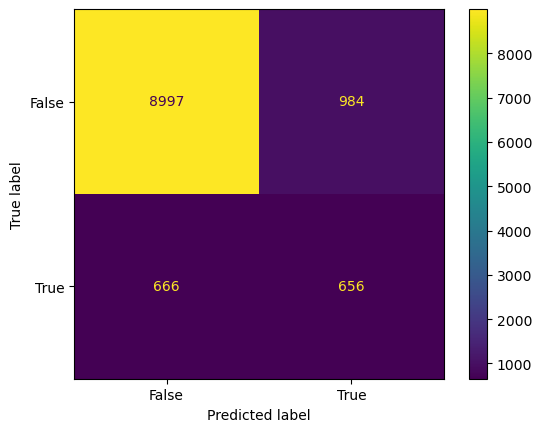

In [19]:
conf_matrix_plot(gnb, X_test, y_test)

### A confusion matrix is divided into four quadrants:

Top-Left (True Negatives - TN):
Value: 8997
Explanation: The model correctly predicted "False" when the actual label was "False". This indicates the model is quite accurate in identifying the negative class.

Top-Right (False Positives - FP):
Value: 984
Explanation: The model incorrectly predicted "True" when the actual label was "False". This indicates the number of negative instances incorrectly classified as positive.

Bottom-Left (False Negatives - FN):
Value: 666
Explanation: The model incorrectly predicted "False" when the actual label was "True". This indicates the number of positive instances incorrectly classified as negative.

Bottom-Right (True Positives - TP):
Value: 656
Explanation: The model correctly predicted "True" when the actual label was "True". This indicates the model's effectiveness in identifying the positive class.


### Interpretation
Accuracy: The proportion of the total number of predictions that were correct.
 
This will give you an overall measure of how often the model is correct.

Precision: The proportion of positive predictions that were actually correct.
 
This measures the accuracy of the positive predictions.

Recall (Sensitivity): The proportion of actual positives that were correctly predicted.

This measures the ability of the model to identify all positive instances.

F1 Score: The harmonic mean of precision and recall, providing a balance between the two.

 
### Color Coding and Scale
The color coding represents the density or count of instances in each quadrant.
The color bar on the right side indicates the range of values, with yellow representing higher counts and dark purple representing lower counts.

### Conclusion
High True Negatives (8997): Indicates the model is very good at predicting the negative class.
Moderate True Positives (656): Shows the model's capability in correctly identifying the positive class, though not as high as the true negatives.
Moderate False Positives (984) and False Negatives (666): Indicate areas where the model can improve, especially in correctly predicting positive cases.

### Confusion Matrix for Scaled Data

The model seems not to be performing too well so let us Scale it.

We'll use a function called `MinMaxScaler`, which we'll import from the `sklearn.preprocessing` module. `MinMaxScaler` normalizes each column so every value falls in the range of [0, 1]. The column's maximum value would scale to 1, and its minimum value would scale to 0. Everything else would fall somewhere between. This is the formula:

$${x_{scaled}} = \frac{x - x_{min}}{x_{max} - x_{min}}$$ 

To use a scaler, you must fit it to the training data, and transform both the training data _and_ the test data using that same scaler. 

Let's apply this and retrain the model.

In [20]:
# Import the scaler function
from sklearn.preprocessing import MinMaxScaler

# Instantiate the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Scale the training data
X_train = scaler.transform(X_train)

# Scale the test data
X_test = scaler.transform(X_test)

In [21]:
# Fit the model
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train, y_train)

# Get the predictions on test data
scaled_preds = gnb_scaled.predict(X_test)

In [22]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, scaled_preds))
print('Precision:', '%.3f' % precision_score(y_test,scaled_preds))
print('Recall:', '%.3f' % recall_score(y_test, scaled_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, scaled_preds))

Accuracy: 0.838
Precision: 0.362
Recall: 0.508
F1 Score: 0.422


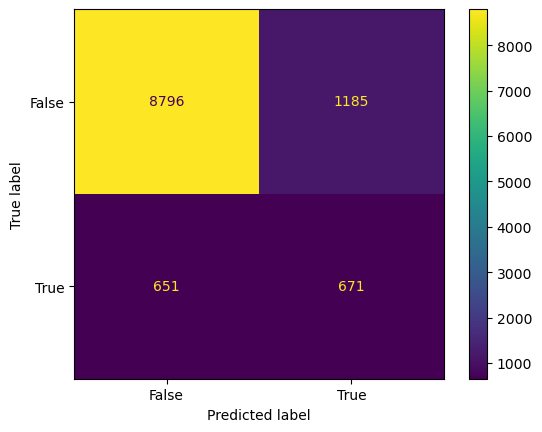

In [23]:
conf_matrix_plot(gnb_scaled, X_test, y_test)

This confusion matrix is helpful to diagnose the areas where the model performs well and where it may need improvement, especially if there's a class imbalance or if the cost of false positives/negatives is high in the given context.

### Breakdown and Interpretation.

Top-Left (True Negatives - TN):

Value: 8796
Explanation: The model correctly predicted "False" when the actual label was "False".

Top-Right (False Positives - FP):

Value: 1185
Explanation: The model incorrectly predicted "True" when the actual label was "False".

Bottom-Left (False Negatives - FN):

Value: 651
Explanation: The model incorrectly predicted "False" when the actual label was "True".

Bottom-Right (True Positives - TP):

Value: 671
Explanation: The model correctly predicted "True" when the actual label was "True".

### Interpretation
Accuracy: The proportion of the total number of predictions that were correct.

Precision: The proportion of positive predictions that were actually correct.

Recall (Sensitivity): The proportion of actual positives that were correctly predicted.

F1 Score: The harmonic mean of precision and recall, providing a balance between the two.

### Color Coding and Scale
The color coding represents the density or count of instances in each quadrant.
The color bar on the right side indicates the range of values, with yellow representing higher counts and dark purple representing lower counts.

### Conclusion
High True Negatives (8796): Indicates the model is very good at predicting the negative class.
Moderate True Positives (671): Shows the model's capability in correctly identifying the positive class, though not as high as the true negatives.
Moderate False Positives (1185) and False Negatives (651): Indicate areas where the model can improve, especially in correctly predicting positive cases.

### Comparing the Two Confusion Marixes from the Scaled and Unscaled Data In the Context of the Data being Analyzed.

In the context of predicting whether a bank customer will subscribe to a term deposit, the confusion matrices provide a detailed insight into the model's performance. Let's analyze both matrices in this context.

Confusion Matrices
Scaled Data Confusion Matrix:

True Negatives (TN): 8796
False Positives (FP): 1185
False Negatives (FN): 651
True Positives (TP): 671

Unscaled Data Confusion Matrix:

True Negatives (TN): 8997
False Positives (FP): 984
False Negatives (FN): 666
True Positives (TP): 656

Explanation in the Banking Context:

True Negatives (TN): These are the customers who were correctly predicted to not subscribe to a term deposit.
False Positives (FP): These are the customers who were incorrectly predicted to subscribe to a term deposit, but they did not.
False Negatives (FN): These are the customers who were incorrectly predicted to not subscribe to a term deposit, but they actually did.
True Positives (TP): These are the customers who were correctly predicted to subscribe to a term deposit.

Comparison and Interpretation

True Negatives (TN)
Scaled Data Confusion Matrix: 8796
Unscaled Data Confusion Matrix: 8997
Interpretation: The unscaled data model correctly identifies more customers who did not subscribe, indicating a slightly better performance in identifying non-subscribers.

False Positives (FP)
Scaled Data Confusion Matrix: 1185
Unscaled Data Confusion Matrix: 984
Interpretation: The unscaled data model has fewer false positives, meaning it makes fewer incorrect predictions that a customer will subscribe when they actually won't. This is important for avoiding unnecessary marketing efforts and costs.

False Negatives (FN)
Scaled Data Confusion Matrix: 651
Unscaled Data Confusion Matrix: 666
Interpretation: The scaled data model has fewer false negatives, indicating it misses fewer actual subscribers. This is crucial as missing out on potential subscribers could mean lost opportunities for the bank.

True Positives (TP)
Scaled Data Confusion Matrix: 671
Unscaled Data Confusion Matrix: 656
Interpretation: The scaled data model correctly identifies more actual subscribers, which is beneficial for targeting marketing efforts and maximizing subscriptions.

On Accuracy, The unscaled data model has a slightly higher accuracy.
On Precision, The unscaled model has a higher precision, indicating it has fewer false positives relative to the number of true positives.
On Recall, The scaled data model has a higher recall, indicating it is better at identifying actual positives.
On F1 Score, The unscaled data model has a slightly higher F1 score, indicating a better balance between precision and recall.

## Conclusion:
Unscaled Data Model: Better accuracy and precision, indicating fewer false positives and more reliable predictions for marketing purposes.
Scaled Data Model: Higher recall and F1 score, indicating it captures more actual subscribers, which is essential for maximizing customer acquisition.

## Business Decision:
Focus on Precision: If the bank wants to minimize marketing costs and avoid targeting non-interested customers, the unscaled data model is better.
Focus on Recall: If the bank aims to capture as many potential subscribers as possible, the scaled data model is preferable.
Choosing between these models depends on the bank's priorities—whether it values reducing false positives (and thus marketing costs) or maximizing the number of subscribers (and thus potential revenue).

## Correct the Observed Imbalance, Rebuild, Fit and Test the Model

In [24]:
X = df.copy()
X = X.drop('subscription_status_yes', axis=1)

In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [28]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, \
                                                    stratify=y, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train a Random Forest classifier on the balanced dataset
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_res, y_train_res)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[11264   713]
 [  853   734]]
              precision    recall  f1-score   support

       False       0.93      0.94      0.94     11977
        True       0.51      0.46      0.48      1587

    accuracy                           0.88     13564
   macro avg       0.72      0.70      0.71     13564
weighted avg       0.88      0.88      0.88     13564



The balanced data evidently performed better in metrics such as precision, recall, F1-score, and support for both classes (False and True):

#### False (Non-Subscribers)
Precision: 0.93
This means that 93% of the predicted non-subscribers were actually non-subscribers.
Recall: 0.94
This indicates that 94% of the actual non-subscribers were correctly predicted by the model.
F1-Score: 0.94
The F1-score is the harmonic mean of precision and recall, providing a balance between the two.
Support: 11977
The total number of actual non-subscribers in the test set.


#### True (Subscribers)
Precision: 0.51
This means that 51% of the predicted subscribers were actually subscribers.
Recall: 0.46
This indicates that 46% of the actual subscribers were correctly predicted by the model.
F1-Score: 0.48
The F1-score is the harmonic mean of precision and recall.
Support: 1587
The total number of actual subscribers in the test set.


#### Overall Metrics
Accuracy: 0.88
The overall accuracy of the model, which indicates that 88% of the total predictions were correct.
Macro Average:
Precision: 0.72
The average precision across both classes.
Recall: 0.70
The average recall across both classes.
F1-Score: 0.71
The average F1-score across both classes.

#### Weighted Average:
Precision: 0.88
The precision, weighted by the number of true instances for each class.
Recall: 0.88
The recall, weighted by the number of true instances for each class.
F1-Score: 0.88
The F1-score, weighted by the number of true instances for each class.

### Interpretation in Banking Context
The model is used to predict whether a bank customer will subscribe to a term deposit.

#### Non-Subscribers (False):
High Precision and Recall: The model is very effective at identifying non-subscribers, with both precision and recall around 0.94. This means it correctly identifies a large portion of customers who will not subscribe, which is beneficial for avoiding unnecessary marketing efforts.
#### Subscribers (True):
Moderate Precision and Recall: The model's performance is moderate for identifying subscribers, with precision at 0.51 and recall at 0.46. This means that while about half of the predicted subscribers are actual subscribers, the model misses a significant number of actual subscribers (only identifying 46% of them).


### Business Implications
Marketing Efficiency: The model's high precision and recall for non-subscribers suggest that it can help in avoiding wasted marketing resources on individuals who are unlikely to subscribe.
Potential Revenue: The moderate precision and recall for subscribers indicate that there is room for improvement in identifying potential subscribers. Missing out on actual subscribers (low recall) means missed opportunities for the bank to convert these customers.
Balance: The overall accuracy is high at 88%, but the balance between identifying non-subscribers and subscribers could be improved to enhance the model's effectiveness in both reducing marketing costs and maximizing subscriptions.

The data was taken from https://archive.ics.uci.edu/dataset/222/bank+marketing